In [27]:
import tensorflow
import matplotlib.pyplot as plt
import numpy as np


# Emotion Detector

### Preprocessing

In [28]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [29]:
train_dir = "./data/emotion/train" 
test_dir = "./data/emotion/test"  # Directory containing the validation data

In [30]:
train_datagen = ImageDataGenerator(
    width_shift_range = 0.1,        # Randomly shift the width of images by up to 10%
    height_shift_range = 0.1,       # Randomly shift the height of images by up to 10%
    horizontal_flip = True,         # Flip images horizontally at random
    rescale = 1./255,               # Rescale pixel values to be between 0 and 1
    validation_split = 0.2          # Set aside 20% of the data for validation
)

validation_datagen = ImageDataGenerator(
    rescale = 1./255,               # Rescale pixel values to be between 0 and 1
    validation_split = 0.2          # Set aside 20% of the data for validation
)

In [31]:
train_generator = train_datagen.flow_from_directory(
    directory = train_dir,           # Directory containing the training data
    target_size = (48, 48),          # Resizes all images to 48x48 pixels
    batch_size = 64,                 # Number of images per batch
    color_mode = "grayscale",        # Converts the images to grayscale
    class_mode = "categorical",      # Classifies the images into 7 categories
    subset = "training"              # Uses the training subset of the data
)

validation_generator = validation_datagen.flow_from_directory(
    directory = test_dir,            # Directory containing the validation data
    target_size = (48, 48),          # Resizes all images to 48x48 pixels
    batch_size = 64,                 # Number of images per batch
    color_mode = "grayscale",        # Converts the images to grayscale
    class_mode = "categorical",      # Classifies the images into 7 categories
    subset = "validation"            # Uses the validation subset of the data
)

Found 17420 images belonging to 8 classes.
Found 1452 images belonging to 8 classes.


### Modeling

To develop the CNN architecture, we will begin by defining the input layer and the number of filters in the first convolutional layer. Then, we will add additional convolutional layers with increasing numbers of filters, followed by max-pooling layers to reduce the spatial dimensions of the feature maps. After the convolutional layers, we will add fully connected layers with ReLU activation to classify the emotions.

We will experiment with different numbers of convolutional layers, filter sizes, and fully connected layers to optimize the model performance. Additionally, we will use techniques such as dropout and batch normalization to prevent overfitting and improve the generalization capability of the model.

In [32]:
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D,BatchNormalization
from tensorflow.keras.models import Sequential
import tensorflow as tf 

# Define the model architecture
model = Sequential()

# Add a convolutional layer with 32 filters, 3x3 kernel size, and relu activation function
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48,48,1)))
# Add a batch normalization layer
model.add(BatchNormalization())
# Add a second convolutional layer with 64 filters, 3x3 kernel size, and relu activation function
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
# Add a second batch normalization layer
model.add(BatchNormalization())
# Add a max pooling layer with 2x2 pool size
model.add(MaxPooling2D(pool_size=(2, 2)))
# Add a dropout layer with 0.25 dropout rate
model.add(Dropout(0.25))

# Add a third convolutional layer with 128 filters, 3x3 kernel size, and relu activation function
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
# Add a third batch normalization layer
model.add(BatchNormalization())
# Add a fourth convolutional layer with 128 filters, 3x3 kernel size, and relu activation function
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
# Add a fourth batch normalization layer
model.add(BatchNormalization())
# Add a max pooling layer with 2x2 pool size
model.add(MaxPooling2D(pool_size=(2, 2)))
# Add a dropout layer with 0.25 dropout rate
model.add(Dropout(0.25))

# Add a fifth convolutional layer with 256 filters, 3x3 kernel size, and relu activation function
model.add(Conv2D(256, kernel_size=(3, 3), activation='relu'))
# Add a fifth batch normalization layer
model.add(BatchNormalization())
# Add a sixth convolutional layer with 256 filters, 3x3 kernel size, and relu activation function
model.add(Conv2D(256, kernel_size=(3, 3), activation='relu'))
# Add a sixth batch normalization layer
model.add(BatchNormalization())
# Add a max pooling layer with 2x2 pool size
model.add(MaxPooling2D(pool_size=(2, 2)))
# Add a dropout layer with 0.25 dropout rate
model.add(Dropout(0.25))

# Flatten the output of the convolutional layers
model.add(Flatten())
# Add a dense layer with 256 neurons and relu activation function
model.add(Dense(256, activation='relu'))
# Add a seventh batch normalization layer
model.add(BatchNormalization())
# Add a dropout layer with 0.5 dropout rate
model.add(Dropout(0.5))
# Add a dense layer with 8 neurons (one for each class) and softmax activation function
model.add(Dense(8, activation='softmax'))

# Compile the model with categorical cross-entropy loss, adam optimizer, and accuracy metric
model.compile(loss="categorical_crossentropy", optimizer= tf.keras.optimizers.Adam(learning_rate=0.0001), metrics=['accuracy'])

In [33]:
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the callback
checkpoint_callback = ModelCheckpoint(
    filepath='model_weights.h5',
    monitor='val_accuracy',
    save_best_only=True,
    save_weights_only=True,
    mode='max',
    verbose=1
)

# Train the model with the callback
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=50,
    validation_data=validation_generator,
    validation_steps=len(validation_generator),
    callbacks=[checkpoint_callback]
)

Epoch 1/50
273/273 [==============================] - ETA: 0s - loss: 2.9071 - accuracy: 0.1834
Epoch 1: val_accuracy improved from -inf to 0.08884, saving model to model_weights.h5
273/273 [==============================] - 243s 881ms/step - loss: 2.9071 - accuracy: 0.1834 - val_loss: 2.5530 - val_accuracy: 0.0888
Epoch 2/50
273/273 [==============================] - ETA: 0s - loss: 2.4978 - accuracy: 0.2310
Epoch 2: val_accuracy improved from 0.08884 to 0.23209, saving model to model_weights.h5
273/273 [==============================] - 231s 844ms/step - loss: 2.4978 - accuracy: 0.2310 - val_loss: 2.1136 - val_accuracy: 0.2321
Epoch 3/50
273/273 [==============================] - ETA: 0s - loss: 2.2510 - accuracy: 0.2762
Epoch 3: val_accuracy improved from 0.23209 to 0.28444, saving model to model_weights.h5
273/273 [==============================] - 225s 824ms/step - loss: 2.2510 - accuracy: 0.2762 - val_loss: 1.9827 - val_accuracy: 0.2844
Epoch 4/50
273/273 [=======================

273/273 [==============================] - 220s 804ms/step - loss: 1.1145 - accuracy: 0.5867 - val_loss: 1.7375 - val_accuracy: 0.4566
Epoch 28/50
273/273 [==============================] - ETA: 0s - loss: 1.1065 - accuracy: 0.5901
Epoch 28: val_accuracy improved from 0.45661 to 0.45799, saving model to model_weights.h5
273/273 [==============================] - 218s 800ms/step - loss: 1.1065 - accuracy: 0.5901 - val_loss: 1.6557 - val_accuracy: 0.4580
Epoch 29/50
273/273 [==============================] - ETA: 0s - loss: 1.0894 - accuracy: 0.6005
Epoch 29: val_accuracy improved from 0.45799 to 0.46488, saving model to model_weights.h5
273/273 [==============================] - 219s 803ms/step - loss: 1.0894 - accuracy: 0.6005 - val_loss: 1.7113 - val_accuracy: 0.4649
Epoch 30/50
273/273 [==============================] - ETA: 0s - loss: 1.0872 - accuracy: 0.6015
Epoch 30: val_accuracy did not improve from 0.46488
273/273 [==============================] - 219s 802ms/step - loss: 1.087

### Evaluation

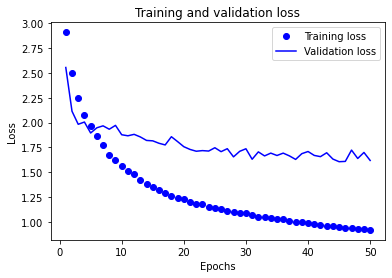

In [34]:
# Plot the train and validation loss
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(train_loss) + 1)
plt.plot(epochs, train_loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

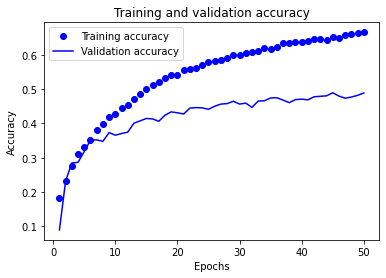

In [35]:
# Plot the train and validation accuracy
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, train_acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

23/23 [==============================] - 5s 188ms/step


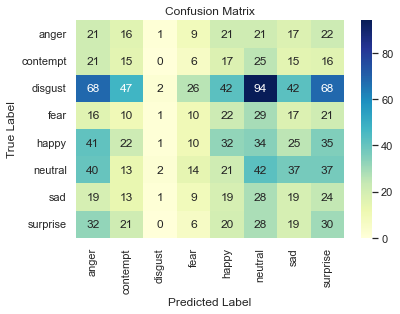

In [36]:
import seaborn as sns 
from sklearn.metrics import confusion_matrix

# Get the true labels and predicted labels for the validation set
validation_labels = validation_generator.classes
validation_pred_probs = model.predict(validation_generator)
validation_pred_labels = np.argmax(validation_pred_probs, axis=1)

# Compute the confusion matrix
confusion_mtx = confusion_matrix(validation_labels, validation_pred_labels)
class_names = list(train_generator.class_indices.keys())
sns.set()
sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap='YlGnBu', 
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show() 

# Face recognition 

### preprocessing

In [37]:
train_dir1 = "./data/faces/train" 
test_dir1 = "./data/faces/test"

In [38]:
train_generator1 = train_datagen.flow_from_directory(
    directory = train_dir1,           # Directory containing the training data
    target_size = (48, 48),          # Resizes all images to 48x48 pixels
    batch_size = 64,                 # Number of images per batch
    color_mode = "grayscale",        # Converts the images to grayscale
    class_mode = "categorical",      # Classifies the images into 7 categories
    subset = "training"              # Uses the training subset of the data
)

validation_generator1 = validation_datagen.flow_from_directory(
    directory = test_dir1,            # Directory containing the validation data
    target_size = (48, 48),          # Resizes all images to 48x48 pixels
    batch_size = 64,                 # Number of images per batch
    color_mode = "grayscale",        # Converts the images to grayscale
    class_mode = "categorical",      # Classifies the images into 7 categories
    subset = "validation"            # Uses the validation subset of the data
)

Found 611 images belonging to 3 classes.
Found 36 images belonging to 3 classes.


In [39]:

# Define the model architecture
modelf = Sequential()

# Add a convolutional layer with 32 filters, 3x3 kernel size, and relu activation function
modelf.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48,48,1)))
# Add a batch normalization layer
modelf.add(BatchNormalization())
# Add a second convolutional layer with 64 filters, 3x3 kernel size, and relu activation function
modelf.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
# Add a second batch normalization layer
modelf.add(BatchNormalization())
# Add a max pooling layer with 2x2 pool size
modelf.add(MaxPooling2D(pool_size=(2, 2)))
# Add a dropout layer with 0.25 dropout rate
modelf.add(Dropout(0.25))

# Add a third convolutional layer with 128 filters, 3x3 kernel size, and relu activation function
modelf.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
# Add a third batch normalization layer
modelf.add(BatchNormalization())
# Add a fourth convolutional layer with 128 filters, 3x3 kernel size, and relu activation function
modelf.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
# Add a fourth batch normalization layer
modelf.add(BatchNormalization())
# Add a max pooling layer with 2x2 pool size
modelf.add(MaxPooling2D(pool_size=(2, 2)))
# Add a dropout layer with 0.25 dropout rate
modelf.add(Dropout(0.25))



# Flatten the output of the convolutional layers
modelf.add(Flatten())
# Add a dense layer with 256 neurons and relu activation function
modelf.add(Dense(128, activation='relu'))
# Add a seventh batch normalization layer
modelf.add(BatchNormalization())
# Add a dropout layer with 0.5 dropout rate
modelf.add(Dropout(0.5))
# Add a dense layer with 3 neurons (one for each class) and softmax activation function
modelf.add(Dense(3, activation='softmax'))

# Compile the model with categorical cross-entropy loss, adam optimizer, and accuracy metric
modelf.compile(loss="categorical_crossentropy", optimizer= tf.keras.optimizers.Adam(learning_rate=0.0001), metrics=['accuracy'])

In [40]:

# Define the callback
checkpoint_callback = ModelCheckpoint(
    filepath='model_weights.h5',
    monitor='val_accuracy',
    save_best_only=True,
    save_weights_only=True,
    mode='max',
    verbose=1
)

# Train the model with the callback
historyf = modelf.fit(
    train_generator1,
    steps_per_epoch=len(train_generator1),
    epochs=70,
    validation_data=validation_generator1,
    validation_steps=len(validation_generator1),
    callbacks=[checkpoint_callback]
)

Epoch 1/70
10/10 [==============================] - ETA: 0s - loss: 1.5511 - accuracy: 0.4288
Epoch 1: val_accuracy improved from -inf to 0.41667, saving model to model_weights.h5
10/10 [==============================] - 8s 661ms/step - loss: 1.5511 - accuracy: 0.4288 - val_loss: 1.0897 - val_accuracy: 0.4167
Epoch 2/70
10/10 [==============================] - ETA: 0s - loss: 1.1251 - accuracy: 0.6105
Epoch 2: val_accuracy did not improve from 0.41667
10/10 [==============================] - 6s 655ms/step - loss: 1.1251 - accuracy: 0.6105 - val_loss: 1.1087 - val_accuracy: 0.2222
Epoch 3/70
10/10 [==============================] - ETA: 0s - loss: 0.8834 - accuracy: 0.7005
Epoch 3: val_accuracy did not improve from 0.41667
10/10 [==============================] - 6s 623ms/step - loss: 0.8834 - accuracy: 0.7005 - val_loss: 1.1396 - val_accuracy: 0.2222
Epoch 4/70
10/10 [==============================] - ETA: 0s - loss: 0.9082 - accuracy: 0.6743
Epoch 4: val_accuracy did not improve from 

10/10 [==============================] - 6s 620ms/step - loss: 0.2798 - accuracy: 0.8953 - val_loss: 1.7503 - val_accuracy: 0.2222
Epoch 31/70
10/10 [==============================] - ETA: 0s - loss: 0.2590 - accuracy: 0.9133
Epoch 31: val_accuracy did not improve from 0.41667
10/10 [==============================] - 6s 611ms/step - loss: 0.2590 - accuracy: 0.9133 - val_loss: 1.6714 - val_accuracy: 0.2222
Epoch 32/70
10/10 [==============================] - ETA: 0s - loss: 0.2733 - accuracy: 0.9083
Epoch 32: val_accuracy did not improve from 0.41667
10/10 [==============================] - 6s 604ms/step - loss: 0.2733 - accuracy: 0.9083 - val_loss: 1.4482 - val_accuracy: 0.2500
Epoch 33/70
10/10 [==============================] - ETA: 0s - loss: 0.2565 - accuracy: 0.9100
Epoch 33: val_accuracy did not improve from 0.41667
10/10 [==============================] - 6s 665ms/step - loss: 0.2565 - accuracy: 0.9100 - val_loss: 1.5446 - val_accuracy: 0.2222
Epoch 34/70
10/10 [================

Epoch 59/70
10/10 [==============================] - ETA: 0s - loss: 0.1430 - accuracy: 0.9476
Epoch 59: val_accuracy did not improve from 0.88889
10/10 [==============================] - 6s 611ms/step - loss: 0.1430 - accuracy: 0.9476 - val_loss: 0.2182 - val_accuracy: 0.8889
Epoch 60/70
10/10 [==============================] - ETA: 0s - loss: 0.1394 - accuracy: 0.9542
Epoch 60: val_accuracy improved from 0.88889 to 0.91667, saving model to model_weights.h5
10/10 [==============================] - 6s 640ms/step - loss: 0.1394 - accuracy: 0.9542 - val_loss: 0.1540 - val_accuracy: 0.9167
Epoch 61/70
10/10 [==============================] - ETA: 0s - loss: 0.1397 - accuracy: 0.9525
Epoch 61: val_accuracy did not improve from 0.91667
10/10 [==============================] - 6s 639ms/step - loss: 0.1397 - accuracy: 0.9525 - val_loss: 0.1443 - val_accuracy: 0.9167
Epoch 62/70
10/10 [==============================] - ETA: 0s - loss: 0.1636 - accuracy: 0.9460
Epoch 62: val_accuracy did not im

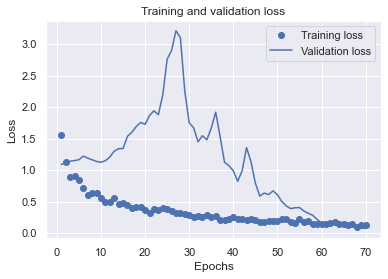

In [41]:
# Plot the train and validation loss
train_loss1 = historyf.history['loss']
val_loss1 = historyf.history['val_loss']
epochs1 = range(1, len(train_loss1) + 1)
plt.plot(epochs1, train_loss1, 'bo', label='Training loss')
plt.plot(epochs1, val_loss1, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

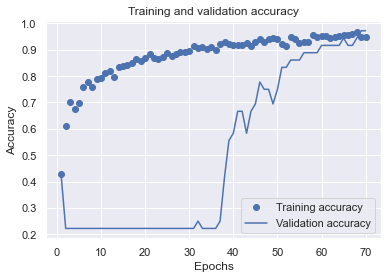

In [42]:
# Plot the train and validation accuracy
train_acc1 = historyf.history['accuracy']
val_acc1 = historyf.history['val_accuracy']
plt.plot(epochs1, train_acc1, 'bo', label='Training accuracy')
plt.plot(epochs1, val_acc1, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

1/1 [==============================] - 0s 231ms/step


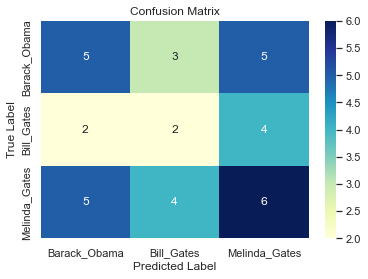

In [43]:
# Get the true labels and predicted labels for the validation set
validation_labels1 = validation_generator1.classes
validation_pred_probs1 = modelf.predict(validation_generator1)
validation_pred_labels1 = np.argmax(validation_pred_probs1, axis=1)

# Compute the confusion matrix
confusion_mtx1 = confusion_matrix(validation_labels1, validation_pred_labels1)
class_names1 = list(train_generator1.class_indices.keys())
sns.set()
sns.heatmap(confusion_mtx1, annot=True, fmt='d', cmap='YlGnBu', 
            xticklabels=class_names1, yticklabels=class_names1)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show() 

(48, 48)
1/1 [==============================] - 0s 125ms/step
[0.0, 0.0, 1.0]
Melinda Gates


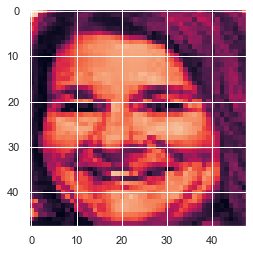

In [44]:
from tensorflow.keras.preprocessing import image
import seaborn as sns 
from sklearn.metrics import confusion_matrix

img = image.load_img("mi.jpg",target_size = (48,48),color_mode = "grayscale")
img = np.array(img)
plt.imshow(img)
print(img.shape) #prints (48,48) that is the shape of our image

label_dict = {0:'Barack Obama',1:'Bill Gates',2:'Melinda Gates'}

img = np.expand_dims(img,axis = 0) #makes image shape (1,48,48)
img = img.reshape(1,48,48,1)
result = modelf.predict(img)
result = list(result[0])
print(result)

img_index = result.index(max(result))
print(label_dict[img_index])
plt.show()

## Main

1/1 [==============================] - 0s 23ms/step


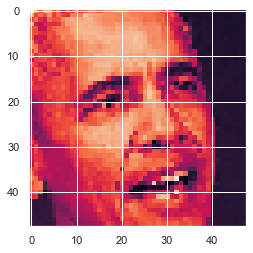

1/1 [==============================] - 0s 24ms/step
Barack Obama  is  Angry
1/1 [==============================] - 0s 13ms/step


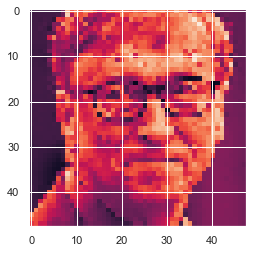

1/1 [==============================] - 0s 28ms/step
Bill Gates  is  Disgusted


In [48]:
import cv2
import numpy as np
from tensorflow.keras.preprocessing import image

#Labels
label_dict = {0:'Barack Obama',1:'Bill Gates',2:'Melinda Gates'}
label_dict1 = {0:'Angry',1:'Contempt',2:'Disgusted',3:'Fearful',4:'Happy',5:'Neutral',6:'Sad',7:'Surprised'}

# Load the Cascade Classifier XML file
cascade_classifier = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

img = cv2.imread('l.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Detect objects in the image
objects = cascade_classifier.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5)

# Draw bounding boxes around the detected objects
for (x, y, w, h) in objects:
    cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)

# Display the image
cv2.imshow('Image', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Loop through the faces and extract each face as an independent image
for i, (x, y, w, h) in enumerate(objects):
    # Crop the face region from the original image
    face_img = img[y:y+h, x:x+w]
    # Save the face image as a separate file
    cv2.imwrite('face{}.jpg'.format(i), face_img)
    img1 = image.load_img('face{}.jpg'.format(i),target_size = (48,48),color_mode = "grayscale")
    img1 = np.array(img1)
    plt.imshow(img1)

    img1 = np.expand_dims(img1,axis = 0) #makes image shape (1,48,48)
    img1 = img1.reshape(1,48,48,1)
    result = modelf.predict(img1)
    result = list(result[0])
    #print(result)

    img1_index = result.index(max(result))
    x=label_dict[img1_index]
    plt.show()
    
    #emotion
    result2 = model.predict(img1)
    result2 = list(result2[0])
    
    #print(result)
    img1_index = result2.index(max(result2))
    y=label_dict1[img1_index]
    
    print(x,' is ',y)
    
